In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import offsetbox
from sklearn.decomposition import PCA
import os
import gzip

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)

In [2]:
def load_data():    
    dirname = os.path.join('datasets', 'fashion-mnist')
    base = 'C:/Users/72915/OneDrive - HKUST Connect/hkust-math/MATH 5473/Project2/data/'
    files = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
    ]

    paths = [base + f_name for f_name in files]

    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

    return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
x_train_row = np.reshape(x_train,[np.shape(x_train)[0],np.shape(x_train)[1]*np.shape(x_train)[2]])
x_test_row = np.reshape(x_test,[np.shape(x_test)[0],np.shape(x_test)[1]*np.shape(x_test)[2]])

In [5]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    """
    show the image
    """
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap="binary", interpolation = "nearest")
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

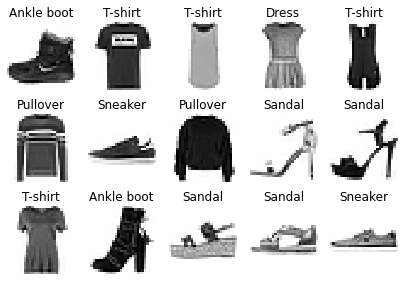

In [6]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)

In [7]:
def plot_result(X,y,image):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    
    fig, ax = plt.subplots(figsize=(8, 8), dpi=110)
#     fig, ax = plt.subplots(111)

    for i in range(0,10):
        plt.scatter(X[y == i,0], X[y == i,1], c=plt.cm.Set1(i))
        
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_rows = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_rows) ** 2, 1)
            if np.min(dist) < 8e-3:
                    # don't show points that are too close
                continue
            shown_rows = np.r_[shown_rows, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(image[i], cmap=plt.cm.gray_r),X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])

    ax.set_xlabel(f'Coordinate 1', color='#646369', fontsize=10)
    ax.set_ylabel(f'Coordinate 2', color='#646369', fontsize=10)
    plt.show()

In [9]:
def pca_embedding():
    print('PCA embedding')
    pca = decomposition.PCA(n_components = 2)
    pca.fit(x_test_row)
    transformed_x_train = None
    transformed_x_test = pca.transform(x_test_row)
    return transformed_x_train, transformed_x_test

PCA embedding


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

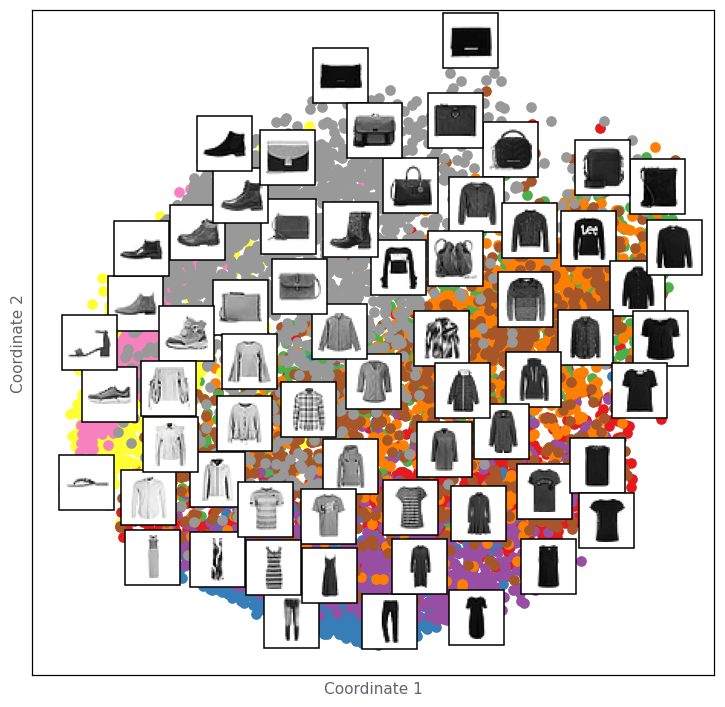

In [10]:
transformed_x_train_pca, transformed_x_test_pca = pca_embedding()
plot_result(transformed_x_test_pca,y_test,x_test)

In [17]:
def mds_embedding():
    print('MDS embedding')
    mds = manifold.MDS(n_components = 2)
    transformed_x_train = None
    transformed_x_test = mds.fit_transform(x_test_row)
    
    return transformed_x_train, transformed_x_test

In [56]:
transformed_x_train_mds, transformed_x_test_mds = mds_embedding()

MDS embedding


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

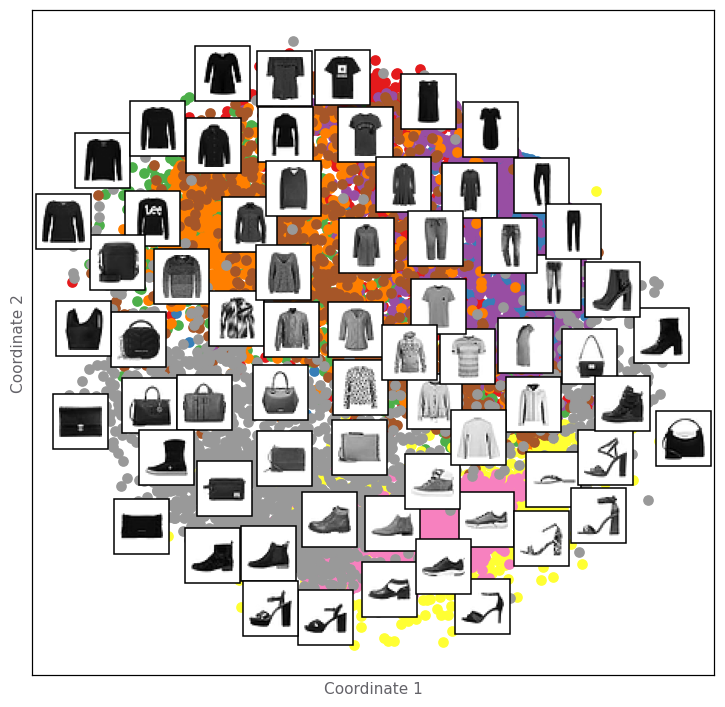

In [57]:
plot_result(transformed_x_test_mds,y_test,x_test)

In [19]:
def isomap_embedding():
    print('ISOMAP embedding')
    isomap = manifold.Isomap(n_components = 2)
    isomap.fit(x_test_row)
    transformed_x_train = None
    transformed_x_test = isomap.transform(x_test_row)
    return transformed_x_train, transformed_x_test

ISOMAP embedding


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

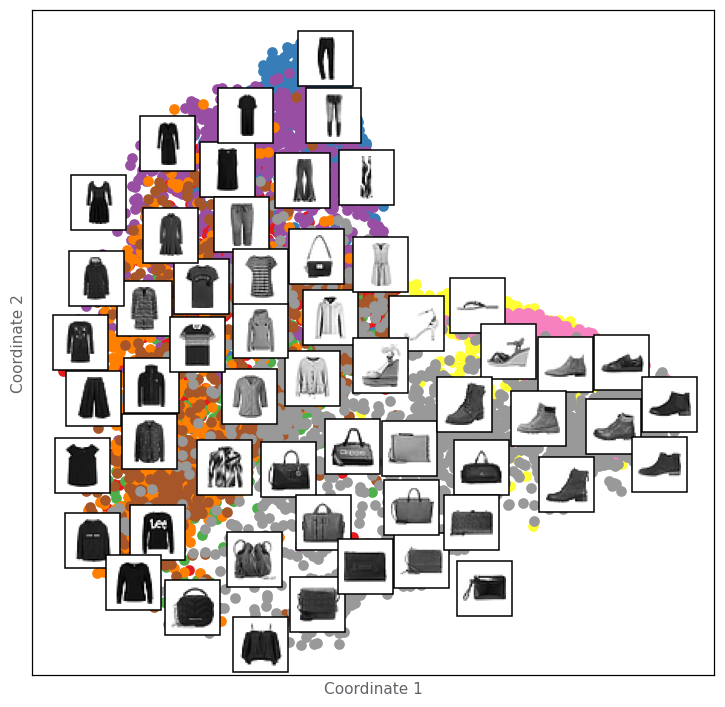

In [20]:
transformed_x_train_isomap, transformed_x_test_isomap = isomap_embedding()
plot_result(transformed_x_test_isomap,y_test,x_test)

In [21]:
def tsne_embedding():
    print('Tsne embedding')
    tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
    transformed_x_train = None
    transformed_x_test = tsne.fit_transform(x_test_row)
    return transformed_x_train, transformed_x_test

Tsne embedding


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

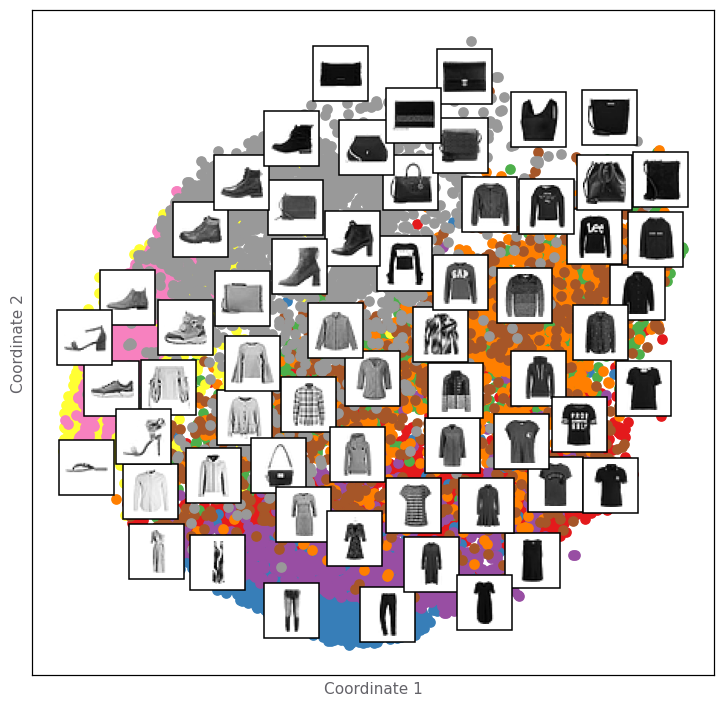

In [22]:
transformed_x_train_tsne, transformed_x_test_tsne = tsne_embedding()
plot_result(transformed_x_test_tsne,y_test,x_test)

In [25]:
def lle_embedding():
    print('LLE embedding')
    lle = manifold.LocallyLinearEmbedding(n_components = 2, method = 'standard')
    transformed_x_train = None
    transformed_x_test = lle.fit_transform(x_test_row)
    return transformed_x_train, transformed_x_test

LLE embedding


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

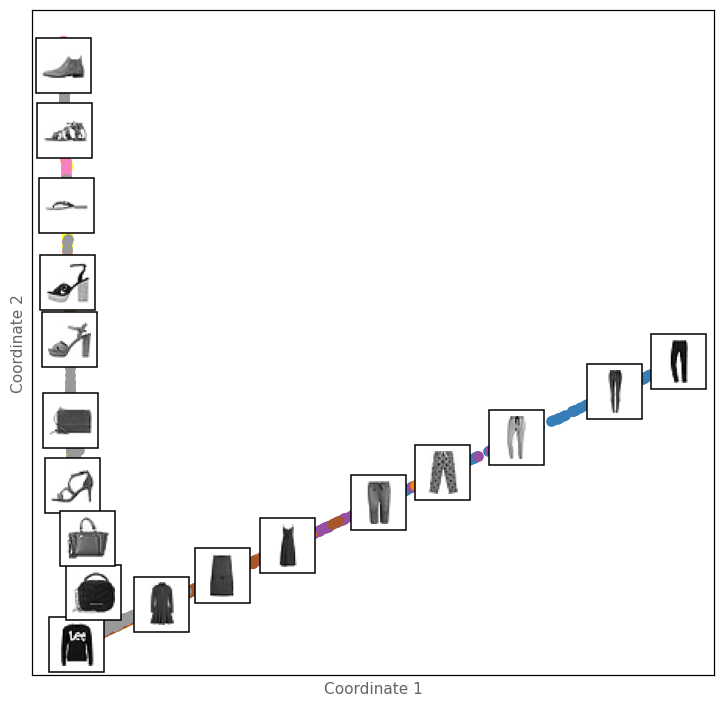

In [26]:
transformed_x_train_lle, transformed_x_test_lle = lle_embedding()
plot_result(transformed_x_test_lle,y_test,x_test)

In [27]:
def mlle_embedding():
    print('ModifiedLLE embedding')
    mlle = manifold.LocallyLinearEmbedding(n_components = 2, method = 'modified')
    transformed_x_train = None
    transformed_x_test = mlle.fit_transform(x_test_row)
    return transformed_x_train, transformed_x_test

ModifiedLLE embedding


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

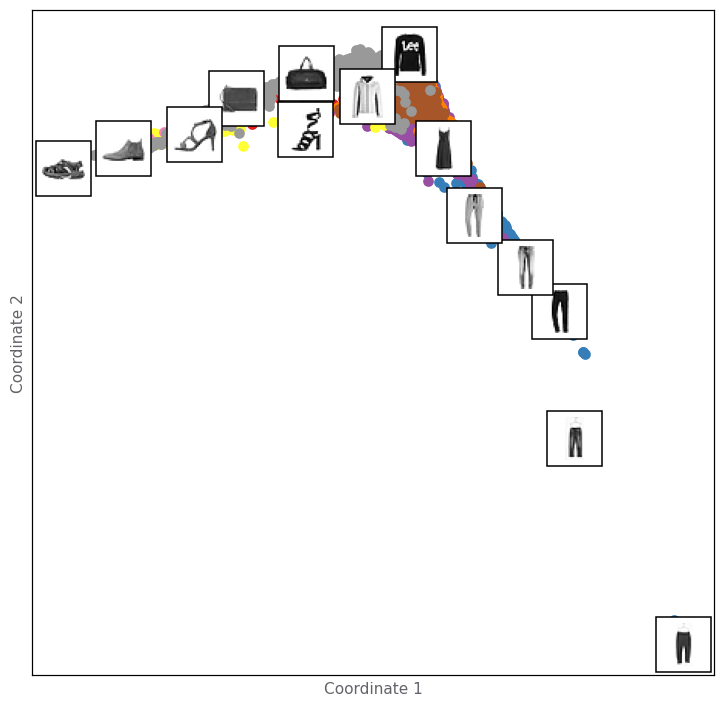

In [28]:
transformed_x_train_mlle, transformed_x_test_mlle = mlle_embedding()
plot_result(transformed_x_test_mlle,y_test,x_test)

In [51]:
def ltsa_embedding():
    print('LTSA embedding')
    ltsa = manifold.LocallyLinearEmbedding(n_components = 2, method = 'ltsa',eigen_solver = 'dense')
    ltsa.fit(x_test_row)
    transformed_x_train = None
    transformed_x_test = ltsa.transform(x_test_row)
    return transformed_x_train, transformed_x_test

LTSA embedding


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

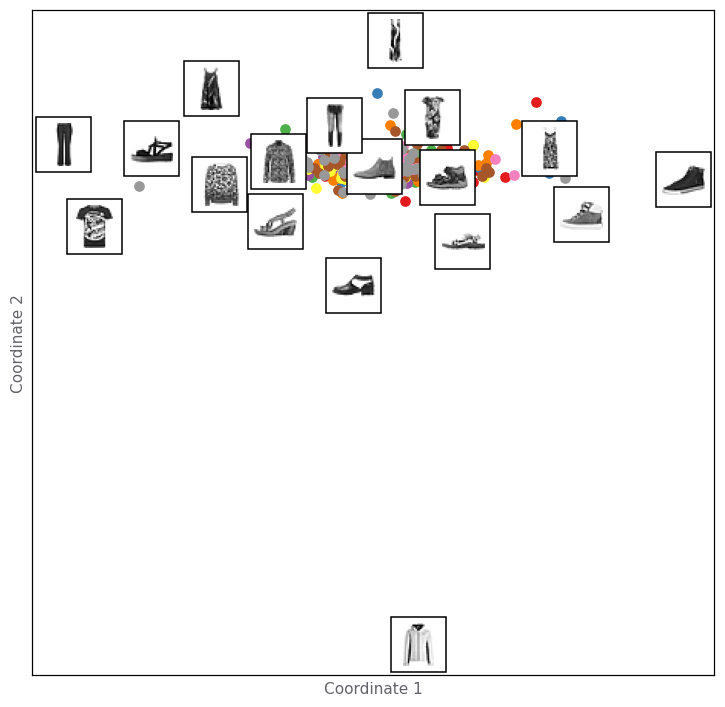

In [52]:
transformed_x_train_ltsa, transformed_x_test_ltsa = ltsa_embedding()
plot_result(transformed_x_test_ltsa,y_test,x_test)

In [47]:
def hlle_embedding():
    print('Hessian LLE embedding')
    hlle = manifold.LocallyLinearEmbedding(n_neighbors = 70, n_components = 2, method = 'hessian', eigen_solver = 'dense')
    hlle.fit(x_test_row)
    transformed_x_train = None
    transformed_x_test = hlle.transform(x_test_row)
    return transformed_x_train, transformed_x_test

Hessian LLE embedding


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

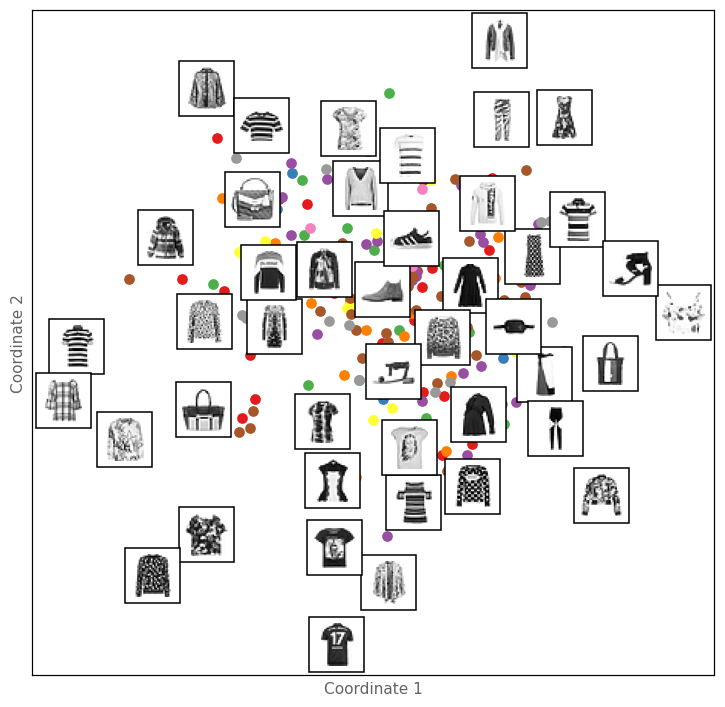

In [48]:
transformed_x_train_hlle, transformed_x_test_hlle = hlle_embedding()
plot_result(transformed_x_test_hlle,y_test,x_test)

In [54]:
def Diffusion_map_embedding():
    print('Diffusion Map embedding')
    dm = manifold.SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = 'arpack')
    transformed_x_train = None
    transformed_x_test = dm.fit_transform(x_test_row)
    return transformed_x_train, transformed_x_test

Diffusion Map embedding


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

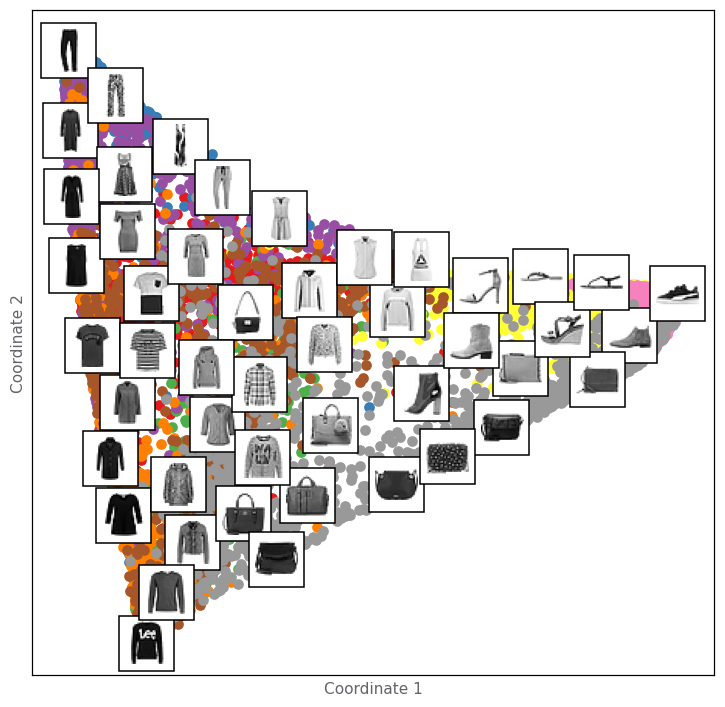

In [55]:
transformed_x_train_dm, transformed_x_test_dm = Diffusion_map_embedding()
plot_result(transformed_x_test_dm,y_test,x_test)

In [70]:
svm = SVC(random_state=0)
scores_pca = cross_val_score(svm, transformed_x_test_pca, y_test, cv=5, scoring='accuracy')
scores_mds = cross_val_score(svm, transformed_x_test_mds, y_test, cv=5, scoring='accuracy')
scores_isomap = cross_val_score(svm, transformed_x_test_isomap, y_test, cv=5, scoring='accuracy')
scores_tsne = cross_val_score(svm, transformed_x_test_tsne, y_test, cv=5, scoring='accuracy')
scores_lle = cross_val_score(svm, transformed_x_test_lle, y_test, cv=5, scoring='accuracy')
scores_mlle = cross_val_score(svm, transformed_x_test_mlle, y_test, cv=5, scoring='accuracy')
scores_ltsa = cross_val_score(svm, transformed_x_test_ltsa, y_test, cv=5, scoring='accuracy')
scores_hlle = cross_val_score(svm, transformed_x_test_hlle, y_test, cv=5, scoring='accuracy')
scores_dm = cross_val_score(svm, transformed_x_test_dm, y_test, cv=5, scoring='accuracy')

In [74]:
scores = [scores_pca, scores_mds, scores_isomap, scores_tsne, scores_lle, scores_mlle, scores_ltsa, scores_hlle,
          scores_dm]
for score in scores:
    print(np.mean(score))

0.545
0.5725999999999999
0.5967
0.5609999999999999
0.5015
0.6161000000000001
0.10569999999999999
0.10289999999999999
0.5801000000000001


In [78]:
RFC = RandomForestClassifier(random_state=0)
scores_pca = cross_val_score(RFC, transformed_x_test_pca, y_test, cv=5, scoring='accuracy')
scores_mds = cross_val_score(RFC, transformed_x_test_mds, y_test, cv=5, scoring='accuracy')
scores_isomap = cross_val_score(RFC, transformed_x_test_isomap, y_test, cv=5, scoring='accuracy')
scores_tsne = cross_val_score(RFC, transformed_x_test_tsne, y_test, cv=5, scoring='accuracy')
scores_lle = cross_val_score(RFC, transformed_x_test_lle, y_test, cv=5, scoring='accuracy')
scores_mlle = cross_val_score(RFC, transformed_x_test_mlle, y_test, cv=5, scoring='accuracy')
scores_ltsa = cross_val_score(RFC, transformed_x_test_ltsa, y_test, cv=5, scoring='accuracy')
scores_hlle = cross_val_score(RFC, transformed_x_test_hlle, y_test, cv=5, scoring='accuracy')
scores_dm = cross_val_score(RFC, transformed_x_test_dm, y_test, cv=5, scoring='accuracy')

In [79]:
scores = [scores_pca, scores_mds, scores_isomap, scores_tsne, scores_lle, scores_mlle, scores_ltsa, scores_hlle,
          scores_dm]
for score in scores:
    print(np.mean(score))

0.49539999999999995
0.5337
0.568
0.5923
0.6740999999999999
0.6425
0.1089
0.10300000000000001
0.5538000000000001


In [6]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [7]:
residual_var = []
for d in range(1,10):
    iso = manifold.Isomap(n_components = d)
    iso.fit(x_test_row)
    x_iso = iso.transform(x_test_row)
    
    distA = pdist(x_iso,metric='euclidean')
    distB = squareform(distA)
    distG = iso.dist_matrix_
    
    v_x = np.reshape(distB,10000*10000)
    v_y = np.reshape(distG,10000*10000)
    
    
    residual_var.append(1 - np.corrcoef(v_x,v_y)[0,1])

In [108]:
residual_var

[0.30294556287522667,
 0.11966233453611341,
 0.06985269847798936,
 0.054062207375166316,
 0.03142275630950453,
 0.027091404724850943,
 0.023556059209048796,
 0.022776071314903112,
 0.019913360353335463]

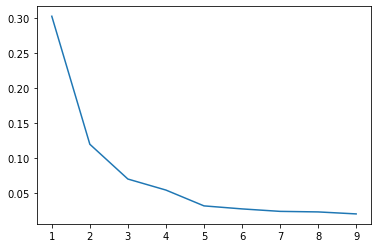

In [112]:
plt.plot(range(1,10),residual_var)

In [8]:
residual_var_2 = []
for d in range(1,10):
    pca_rv = decomposition.PCA(n_components = d)
    pca_rv.fit(x_test_row)
    x_pca = pca_rv.transform(x_test_row)
    
    distA_pca = pdist(x_pca,metric='euclidean')
    distB_pca = squareform(distA_pca)
    distG = iso.dist_matrix_
    
    v_x = np.reshape(distB_pca,10000*10000)
    v_y = np.reshape(distG,10000*10000)
    
    
    residual_var_2.append(1 - np.corrcoef(v_x,v_y)[0,1])

In [9]:
residual_var_3 = []
for d in range(1,10):
    lle_rv = manifold.LocallyLinearEmbedding(n_components = d, method = 'standard')
    lle_rv.fit(x_test_row)
    x_lle = lle_rv.transform(x_test_row)
    
    distA_lle = pdist(x_lle,metric='euclidean')
    distB_lle = squareform(distA_lle)
    distG = iso.dist_matrix_
    
    v_x = np.reshape(distB_lle,10000*10000)
    v_y = np.reshape(distG,10000*10000)
    
    
    residual_var_3.append(1 - np.corrcoef(v_x,v_y)[0,1])

In [ ]:
residual_var_4 = []
for d in range(1,10):
    mds_rv = manifold.MDS(n_components = d)
    mds_rv.fit(x_test_row)
    x_mds = mds_rv.transform(x_test_row)
    
    distA_mds = pdist(x_mds,metric='euclidean')
    distB_mds = squareform(distA_mds)
    distG = iso.dist_matrix_
    
    v_x = np.reshape(distB_mds,10000*10000)
    v_y = np.reshape(distG,10000*10000)
    
    
    residual_var_4.append(1 - np.corrcoef(v_x,v_y)[0,1])

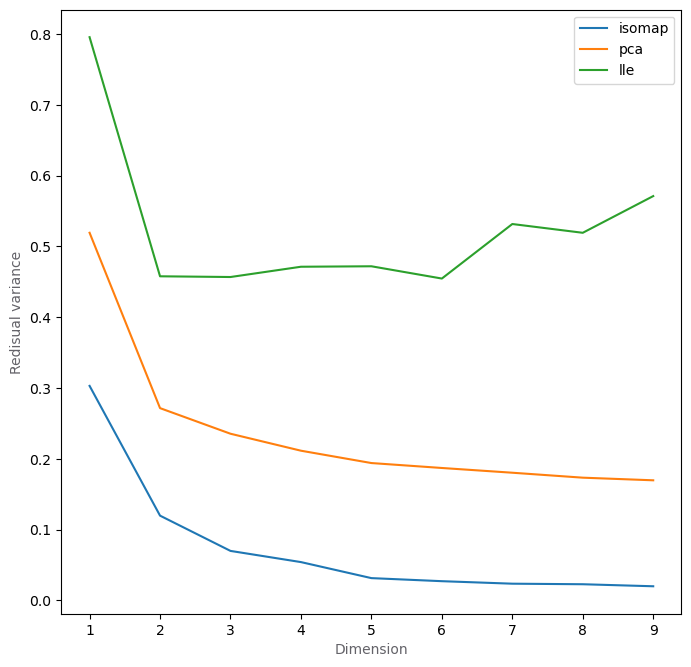

In [15]:
fig, ax = plt.subplots(figsize=(8,8),dpi=100)
plt.plot(range(1,10),residual_var,label = 'isomap')
plt.plot(range(1,10),residual_var_2,label = 'pca')
plt.plot(range(1,10),residual_var_3,label = 'lle')
ax.set_xlabel(f'Dimension', color='#646369', fontsize=10)
ax.set_ylabel(f'Redisual variance', color='#646369', fontsize=10)
plt.legend()